In [107]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,Normalizer

In [108]:
df = pd.read_excel('/Users/Roy/mycode/python/data_analyze/xwallet/xwallet_data.xlsx')
df.head()
df.columns

Index(['贷款申请编号', '贷款账户编号', '账户生效日期', '账户到期日期', '分区', '身份证号首字母', '出生日期', '年龄',
       'total_monthly_obligation', 'score', 'grade', 'probability',
       'closed_accounts', 'past_due_accounts', 'open_accounts',
       'enquiry_alert', 'total_accounts', 'total_installment_amount',
       'total_credit_limit', 'total_used_credit_limit',
       'total_past_due_amount', 'total_accounts_other', 'total_loan_amount',
       'total_outstanding_balance', '7天内信贷查询次数', '15天内信贷查询次数', '30天内信贷查询次数',
       '60天内信贷查询次数', '90天内信贷查询次数', '120天内信贷查询次数', '信贷月查询频繁系数', '7天内新增电话数',
       '15天内新增电话数', '30天内新增电话数', '60天内新增电话数', '90天内新增电话数', '月新增电话系数',
       '30天内新增地址数', '60天内新增地址数', '90天内新增地址数', '月新增地址系数', 'ULC33S',
       'dsr_before', 'dsr_after', 'credit_exposure', '账单期内最大逾期率', '逾期30天以上次数',
       '平均每月还款额', '设备系统', '历史财务公司账户数', '16年至今财务公司账户数', '最大连续逾期天数', '是否逾期',
       '是否破产'],
      dtype='object')

In [109]:
df = df.drop(['贷款申请编号', '贷款账户编号', '账户生效日期', '账户到期日期','出生日期'],axis=1)
df.columns

Index(['分区', '身份证号首字母', '年龄', 'total_monthly_obligation', 'score', 'grade',
       'probability', 'closed_accounts', 'past_due_accounts', 'open_accounts',
       'enquiry_alert', 'total_accounts', 'total_installment_amount',
       'total_credit_limit', 'total_used_credit_limit',
       'total_past_due_amount', 'total_accounts_other', 'total_loan_amount',
       'total_outstanding_balance', '7天内信贷查询次数', '15天内信贷查询次数', '30天内信贷查询次数',
       '60天内信贷查询次数', '90天内信贷查询次数', '120天内信贷查询次数', '信贷月查询频繁系数', '7天内新增电话数',
       '15天内新增电话数', '30天内新增电话数', '60天内新增电话数', '90天内新增电话数', '月新增电话系数',
       '30天内新增地址数', '60天内新增地址数', '90天内新增地址数', '月新增地址系数', 'ULC33S',
       'dsr_before', 'dsr_after', 'credit_exposure', '账单期内最大逾期率', '逾期30天以上次数',
       '平均每月还款额', '设备系统', '历史财务公司账户数', '16年至今财务公司账户数', '最大连续逾期天数', '是否逾期',
       '是否破产'],
      dtype='object')

In [110]:
df2 = pd.DataFrame([(df['是否逾期']=='是'), df['是否破产']=='是']).T
df2['result'] = df2.any(axis=1)
df2

,是否逾期,是否破产,result
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,True,False,True
7,False,False,False
8,False,False,False
9,False,False,False


In [111]:
df['result'] = [1 if x else 0 for x in df2['result']]

In [112]:
df['result'].value_counts()

0    1411
1     149
Name: result, dtype: int64

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 50 columns):
分区                           1560 non-null object
身份证号首字母                      1560 non-null object
年龄                           1560 non-null int64
total_monthly_obligation     1560 non-null float64
score                        1560 non-null int64
grade                        1560 non-null object
probability                  1560 non-null float64
closed_accounts              1560 non-null int64
past_due_accounts            1560 non-null int64
open_accounts                1560 non-null int64
enquiry_alert                1560 non-null int64
total_accounts               1560 non-null object
total_installment_amount     1560 non-null object
total_credit_limit           1560 non-null object
total_used_credit_limit      1560 non-null object
total_past_due_amount        1560 non-null object
total_accounts_other         1560 non-null object
total_loan_amount            1560 non-null obje

In [114]:
df['分区'].value_counts()
df['分区'] = LabelEncoder().fit_transform(df['分区'])

In [115]:
df['身份证号首字母'].value_counts()
df['身份证号首字母'] = LabelEncoder().fit_transform(df['身份证号首字母'])

In [116]:
df

,分区,身份证号首字母,年龄,total_monthly_obligation,score,grade,probability,closed_accounts,past_due_accounts,open_accounts,...,账单期内最大逾期率,逾期30天以上次数,平均每月还款额,设备系统,历史财务公司账户数,16年至今财务公司账户数,最大连续逾期天数,是否逾期,是否破产,result
0,3,11,35,12702.31,2877,HH,10.89,14,0,5,...,0.000000,0,13746,Android,16,5,0,否,否,0
1,14,11,33,9255.24,2937,HH,7.49,1,0,5,...,0.000000,0,4734,Android,1,0,0,否,否,0
2,2,3,47,19691.65,2727,II,25.73,29,0,6,...,0.000000,0,59970,Android,34,4,0,否,否,0
3,7,10,27,2451.34,2847,II,13.12,20,0,4,...,0.000000,0,49284,iOS,17,1,0,否,否,0
4,7,10,28,11119.65,2878,HH,10.88,2,0,5,...,0.000000,0,7723,iOS,5,3,0,否,否,0
5,15,5,45,10707.14,2850,II,12.87,13,0,12,...,0.090909,2,5461,Android,22,6,0,否,否,0
6,16,10,26,14590.34,2803,II,16.95,7,0,6,...,0.043478,3,31089,iOS,8,5,239,是,否,1
7,16,10,26,384.00,3089,FF,2.75,2,0,0,...,0.000000,0,0,Android,2,0,0,否,否,0
8,4,11,33,11437.96,2904,HH,9.21,11,0,7,...,0.000000,0,9993,iOS,3,1,0,否,否,0
9,4,7,38,4272.31,2667,II,34.44,5,0,4,...,0.000000,0,2967,iOS,9,4,0,否,否,0


In [117]:
import matplotlib.pyplot as plt

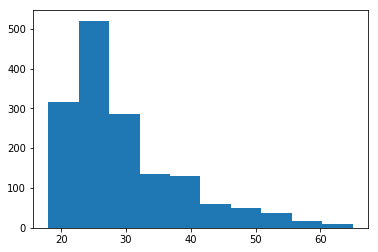

In [118]:
plt.hist(df['年龄'])
plt.show()

In [129]:
def chi2Merge(df,col,target,max_groups=None,threshold=None):
    '''
    卡方分箱
    df: 数据集
    col: 需要分箱的变量名
    target: 类标签
    max_groups: 最大分组数目
    threshold: 卡方阈值，如果未指定max_groups,默认使用95%置信度设置阈值
    return: 包括各组的起始值列表
    '''
    freq_tab = pd.crosstab(df[col], df[target])
    freq = freq_tab.values
    cutoffs = freq_tab.index.values
    if max_groups is None:
        if threshold is None:

chi2Merge(df,'年龄','result')

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65]
